### talib 사용시 https://www.lfd.uci.edu/~gohlke/pythonlibs/ 링크 접속
### TA-Lib: a wrapper for the TA-LIB Technical Analysis Library. 부분을 찾아서 설치
### TA_Lib‑0.4.24‑pp39‑pypy39_pp73‑win_amd64.whl
### 설치 방법은 파이썬 버전이 3.9이고 64비트 인 경우 위 파일을 저장
### 저장후 명령 프롬포트 창에서 위 파일이 존재하는 곳으로 경로를 수정한 뒤
### python -m pip install 파일이름.whl을 실행한다.

In [1]:
import pandas as pd 
import yfinance as yf
import talib

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

In [22]:
print(pd)

<module 'pandas' from 'c:\\Users\\JYB\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\pandas\\__init__.py'>


In [54]:
import pandas as pd 
import yfinance as yf
import numpy as np

# download data 
df = yf.download("005930.KS", 
                 start="2000-01-01", 
                 end="2022-12-31", 
                 auto_adjust=False,
                 progress=False)

# keep only the adjusted close price
df = df.loc[:, ["Adj Close"]] \
       .rename(columns={"Adj Close": "adj_close"})

# calculate simple returns
df["log_rtn"] = np.log(df["adj_close"]/df["adj_close"].shift(1))

# remove redundant data
df = df.drop("adj_close", axis=1) \
       .dropna(axis=0)

df.head()

,log_rtn
Date,
2000-01-05,-0.090738
2000-01-06,0.007143
2000-01-07,-0.014337
2000-01-10,0.040678
2000-01-11,0.000000


In [55]:
df

,log_rtn
Date,
2000-01-05,-0.090738
2000-01-06,0.007143
2000-01-07,-0.014337
2000-01-10,0.040678
2000-01-11,0.000000
...,...
2022-12-23,-0.017065
2022-12-26,-0.003448
2022-12-27,0.003448


In [56]:
import pandas as pd 
import numpy as np

In [57]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

In [59]:
df_rv = (
    df.groupby(pd.Grouper(freq="M"))
    .apply(realized_volatility)
    .rename(columns={"log_rtn": "rv"})
)

In [65]:
df_rv.rv = df_rv["rv"] * np.sqrt(12)

In [66]:
df


,log_rtn
Date,
2000-01-05,-0.090738
2000-01-06,0.007143
2000-01-07,-0.014337
2000-01-10,0.040678
2000-01-11,0.000000
...,...
2022-12-23,-0.017065
2022-12-26,-0.003448
2022-12-27,0.003448


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

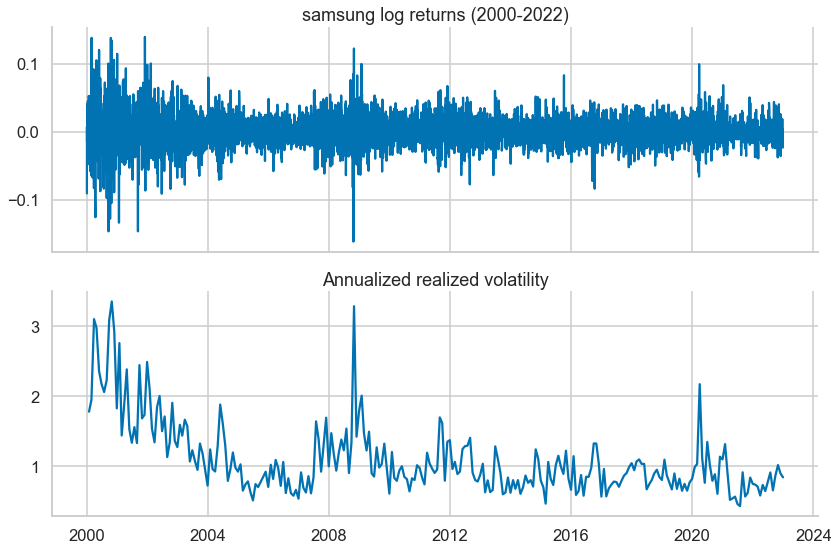

In [68]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[0].set_title("samsung log returns (2000-2022)")
ax[1].plot(df_rv)
ax[1].set_title("Annualized realized volatility")

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_2_5', dpi=200)

In [69]:
import pandas as pd
import numpy as np
import nasdaqdatalink

In [71]:
df = yf.download("005930.KS", 
                 start="2000-01-01", 
                 end="2022-12-31",
                 progress=False,
                 auto_adjust=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-04,4433.304777,4514.582031,4182.084173,4514.582031,74195000
2000-01-05,4285.527134,4477.636971,4078.639617,4122.972656,74680000
2000-01-06,4248.582746,4270.749265,4122.972474,4152.527832,54390000
2000-01-07,4108.193446,4189.470654,3960.416703,4093.415771,40305000
2000-01-10,4137.750081,4263.360352,4122.972402,4263.360352,46880000
...,...,...,...,...,...
2022-12-23,57219.823661,57416.455357,56728.244420,57121.507812,9829407
2022-12-26,57023.186933,57121.502773,56728.239415,56924.871094,6756411
2022-12-27,57023.191964,57416.455357,56924.876116,57121.507812,10667027


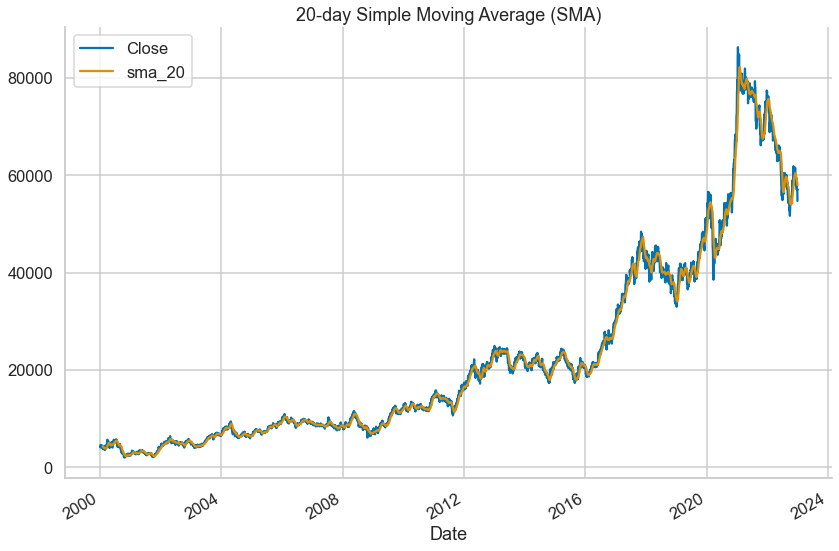

In [72]:
df["sma_20"] = talib.SMA(df["Close"], timeperiod=20)
(
    df[["Close", "sma_20"]]
    .plot(title="20-day Simple Moving Average (SMA)")
)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_1", dpi=200)

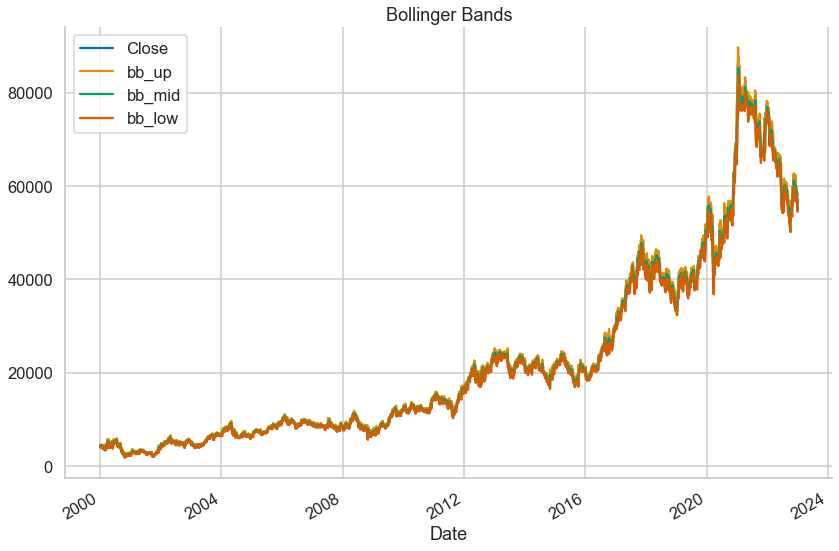

In [73]:
df["bb_up"], df["bb_mid"], df["bb_low"] = talib.BBANDS(df["Close"])

fig, ax = plt.subplots()

(
    df.loc[:, ["Close", "bb_up", "bb_mid", "bb_low"]]
    .plot(ax=ax, title="Bollinger Bands")
)

ax.fill_between(df.index, df["bb_low"], df["bb_up"], 
                color="gray", 
                alpha=.4)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_2", dpi=200)

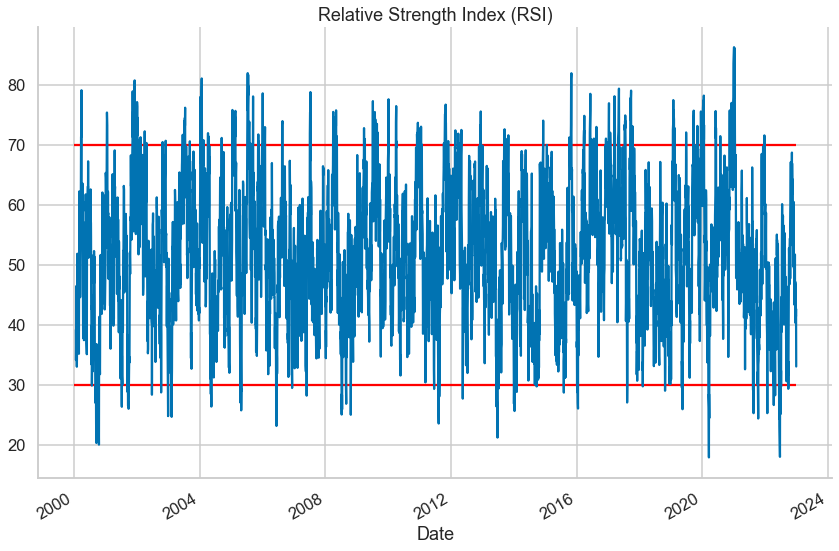

In [74]:
df["rsi"] = talib.RSI(df["Close"])

fig, ax = plt.subplots()
df["rsi"].plot(ax=ax, 
               title="Relative Strength Index (RSI)")
ax.hlines(y=30, 
          xmin=df.index.min(), 
          xmax=df.index.max(), 
          color="red")
ax.hlines(y=70, 
          xmin=df.index.min(), 
          xmax=df.index.max(), 
          color="red")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_3", dpi=200)

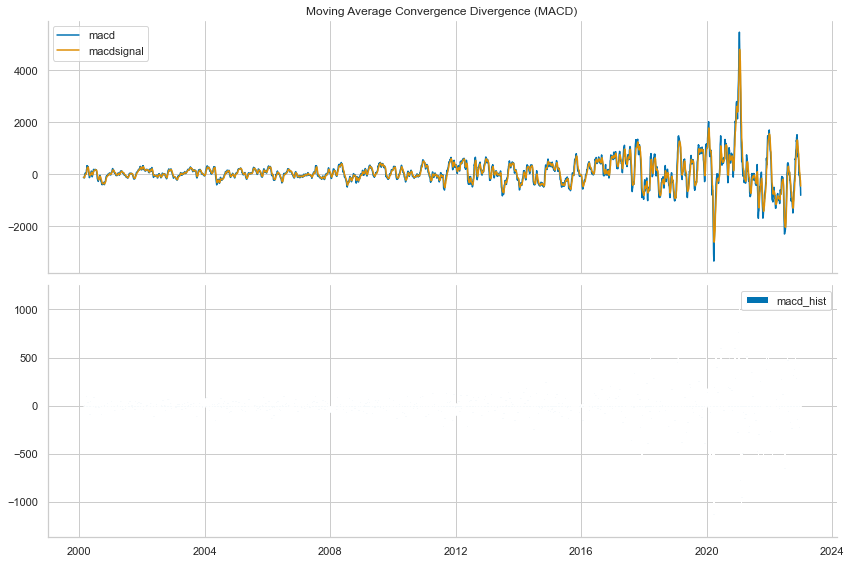

In [75]:
df["macd"], df["macdsignal"], df["macdhist"] = talib.MACD(
    df["Close"], fastperiod=12, slowperiod=26, signalperiod=9
)

with sns.plotting_context("notebook"):
    fig, ax = plt.subplots(2, 1, sharex=True)

    (
        df[["macd", "macdsignal"]].
        plot(ax=ax[0],
             title="Moving Average Convergence Divergence (MACD)")
    )
    ax[1].bar(df.index, df["macdhist"].values, label="macd_hist")
    ax[1].legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_5_4", dpi=200)